In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from parameters import i, e, b, thet, k, ext, tau, W, A, f

In [2]:
# # Parameters
t_array = np.arange(0, 1, 0.0001)
Y0 = [0, 0, 0, 0, 0, 0, 0]
band_type = 'tremor' # select healthy, tremor or beta weights

w = W[band_type]

In [3]:
# Z function
def Z(x,p):
    return (1 / (1 + np.exp(- b[p] * (x - thet[p])))) - (1 / (1 + np.exp(b[p] * thet[p])))

--- 0.15065598487854004 seconds ---


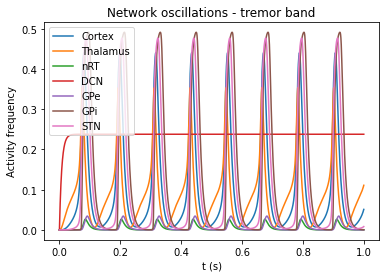

In [4]:
from scipy.integrate import odeint, solve_ivp

# Differential equation
def equation_odeint(Y,t_array):
    
    # Inputs / weights
    Cx = w[1] * Y[1]
    Th = w[2] * Y[0] - w[3] * Y[2] + w[4] * Y[3] - w[5] * Y[5]
    RT = w[6] * Y[0]
    DCN = ext
    GPe = w[7] * Y[6] - w[8] * Y[4]
    GPi = w[9] * Y[6]
    STN = w[10] * Y[0] - w[11] * Y[4]

    # Functions to solve
    dY1 = (-Y[0] + (k[e] - Y[0]) * Z(Cx, e)) / tau
    dY2 = (-Y[1] + (k[e] - Y[1]) * Z(Th, e)) / tau
    dY3 = (-Y[2] + (k[i] - Y[2]) * Z(RT, i)) / tau
    dY4 = (-Y[3] + (k[e] - Y[3]) * Z(DCN, e)) / tau
    dY5 = (-Y[4] + (k[i] - Y[4]) * Z(GPe, i)) / tau
    dY6 = (-Y[5] + (k[i] - Y[5]) * Z(GPi, i)) / tau
    dY7 = (-Y[6] + (k[e] - Y[6]) * Z(STN, e)) / tau
    
    # Return Y'
    return [dY1, dY2, dY3, dY4, dY5, dY6, dY7]

# Measure execution time
start_time = time.time()

# First method = odeint
Y=odeint(equation_odeint, Y0, t_array)
print("--- %s seconds ---" % (time.time() - start_time))

# Display results
plt.plot(t_array,Y)
plt.xlabel("t (s)")
plt.ylabel("Activity frequency")
plt.title(f'Network oscillations - {band_type} band')
plt.legend(['Cortex','Thalamus','nRT','DCN','GPe','GPi','STN'])
plt.show()

--- 0.12254810333251953 seconds ---


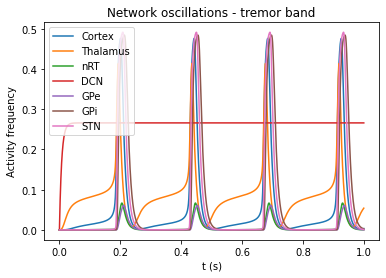

In [5]:
def equation_ivp(t_array, Y):

    # Inputs / weights
    Cx=w[1]*Y[1]
    Th=w[2]*Y[0]-w[3]*Y[2]+w[4]*Y[3]-w[5]*Y[5]
    RT=w[6]*Y[0]
    DCN=ext
    GPe=w[7]*Y[6]-w[8]*Y[4]
    GPi=w[9]*Y[6]
    STN=w[10]*Y[0]-w[11]*Y[4]

    # Functions to solve
    dY1=(-Y[0]+(k[i]-Y[0])*Z(Cx, i))/tau
    dY2=(-Y[1]+(k[i]-Y[1])*Z(Th, i))/tau
    dY3=(-Y[2]+(k[e]-Y[2])*Z(RT, e))/tau
    dY4=(-Y[3]+(k[i]-Y[3])*Z(DCN, i))/tau
    dY5=(-Y[4]+(k[e]-Y[4])*Z(GPe, e))/tau
    dY6=(-Y[5]+(k[e]-Y[5])*Z(GPi, e))/tau
    dY7=(-Y[6]+(k[i]-Y[6])*Z(STN, i))/tau
    
    # Return Y'
    return [dY1, dY2, dY3, dY4, dY5, dY6, dY7]

# Measure execution time
start_time = time.time()

# Solving with IVP to vary integration methods
atol = 1.e-9 # Absolute tolerance
rtol = 1.e-5 # Relative tolerance
sol=solve_ivp(equation_ivp, [0,1], Y0, t_eval=t_array, method='RK45', atol=atol, rtol=rtol)
print("--- %s seconds ---" % (time.time() - start_time))

# Display results
plt.plot(t_array,sol.y.T)
plt.xlabel("t (s)")
plt.ylabel("Activity frequency")
plt.title(f'Network oscillations - {band_type} band')
plt.legend(['Cortex','Thalamus','nRT','DCN','GPe','GPi','STN'])
plt.show()

In [6]:
# DBS Signal

def sigma_sum_odd(start, end, t, expression):
    return sum(expression(n,t) for n in range(start, end+2, 2))


def DBS(n, t):
    return A*(4/np.pi)*((1/n)*np.sin(2*np.pi*n*f*t))

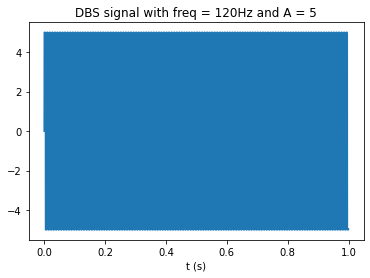

In [7]:
# DBS display

dbs = sigma_sum_odd(1, 1001, t_array, DBS)
plt.plot(t_array, dbs)
plt.xlabel("t (s)")
plt.title(f"DBS signal with freq = {f}Hz and A = {A}")
plt.show()

In [8]:
def equation_DBS(t_array, Y):

    # Inputs / weights
    Cx=w[1]*Y[1]
    Th=w[2]*Y[0]-w[3]*Y[2]+w[4]*Y[3]-w[5]*Y[5]
    RT=w[6]*Y[0]
    DCN=ext
    GPe=w[7]*Y[6]-w[8]*Y[4]
    GPi=w[9]*Y[6]
    STN=w[10]*Y[0]-w[11]*Y[4]+sigma_sum_odd(1, 1001, t_array, DBS)

    # Functions to solve
    dY1=(-Y[0]+(k[i]-Y[0])*Z(Cx, i))/tau
    dY2=(-Y[1]+(k[i]-Y[1])*Z(Th, i))/tau
    dY3=(-Y[2]+(k[e]-Y[2])*Z(RT, e))/tau
    dY4=(-Y[3]+(k[i]-Y[3])*Z(DCN, i))/tau
    dY5=(-Y[4]+(k[e]-Y[4])*Z(GPe, e))/tau
    dY6=(-Y[5]+(k[e]-Y[5])*Z(GPi, e))/tau
    dY7=(-Y[6]+(k[i]-Y[6])*Z(STN, i))/tau
    
    # Return Y'
    return [dY1, dY2, dY3, dY4, dY5, dY6, dY7]



# Measure execution time
start_time = time.time()

atol = 1.e-9 # Absolute tolerance
rtol = 1.e-5 # Relative tolerance
sol=solve_ivp(equation_DBS, [0,1], Y0, t_eval=t_array, method='RK45', atol=atol, rtol=rtol)
print("--- %s seconds ---" % (time.time() - start_time))

--- 26.996718168258667 seconds ---


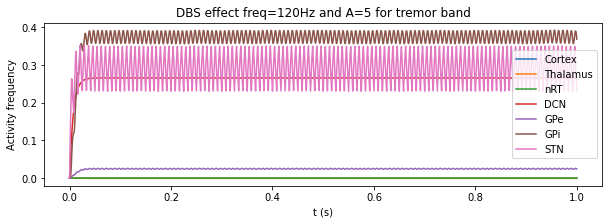

In [10]:
# Display results
fig,ax=plt.subplots(figsize=(10,3))
ax.plot(t_array,sol.y.T)
plt.xlabel("t (s)")
plt.ylabel("Activity frequency")
ax.legend(['Cortex','Thalamus','nRT','DCN','GPe','GPi','STN'])
plt.title(f"DBS effect freq={f}Hz and A={A} for {band_type} band")
plt.show()